In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rn

In [156]:
#dataset
fan = ['Rolling Stones','Neither','Taylor Swift','Taylor Swift','Neither','Taylor Swift','Neither','Taylor Swift','Rolling Stones','Rolling Stones']
numpy_array = np.array([['Bill',32,'M', 'Rolling Stones'],['Henry',40,'M','Neither'],['Mary',16,'F','Taylor Swift'],
['Tiffany',14,'F','Taylor Swift'],['Michael',55,'M','Neither'], ['Carlos',40,'M','Taylor Swift'],
['Ashely',20,'F','Neither'],['Robert',15,'M','Taylor Swift'],['Sally',55,'F','Rolling Stones'],['John',15,'M','Rolling Stones']])

dataset = pd.DataFrame(numpy_array,columns=['Name','Age','Gender','Fan'])

# importing the preprocessing module from scikit-learn for the label change
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

# Fitting it to our dataset
dataset.Gender = LE.fit_transform(dataset.Gender)
dataset.Name = LE.fit_transform(dataset.Name)
dataset

,Name,Age,Gender,Fan
0,1,32,1,Rolling Stones
1,3,40,1,Neither
2,5,16,0,Taylor Swift
3,9,14,0,Taylor Swift
4,6,55,1,Neither
5,2,40,1,Taylor Swift
6,0,20,0,Neither
7,7,15,1,Taylor Swift
8,8,55,0,Rolling Stones
9,4,15,1,Rolling Stones


In [131]:
#shuffler = rn.sample(range(11),10) # Generating 10 random & unique integers

#dataset['ID'] = shuffler # Adding it as a new column

#dataset.set_index('ID', inplace=True) # Resetting the index

# Finally Sorting the DataFrame according to the new index
#dataset.sort_index(inplace=True)
#dataset

In [157]:
# Splitting it on a 70:30 ratio. 
X_train = dataset.iloc[:7, :-1].values # First 7 Data points for Training
X_test = dataset.iloc[7:, :-1].values #Last 3 for Testing
y_train = dataset.iloc[:7, 3]
y_test = dataset.iloc[7:, 3]
print(X_train)

[[1 '32' 1]
 [3 '40' 1]
 [5 '16' 0]
 [9 '14' 0]
 [6 '55' 1]
 [2 '40' 1]
 [0 '20' 0]]


In [174]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

knn.score(X_test, y_test)
y_pred

array(['Rolling Stones', 'Neither', 'Taylor Swift', 'Taylor Swift',
       'Neither', 'Taylor Swift', 'Neither'], dtype=object)

                precision    recall  f1-score   support

       Neither       0.00      0.00      0.00         0
Rolling Stones       0.00      0.00      0.00         2
  Taylor Swift       0.50      1.00      0.67         1

      accuracy                           0.33         3
     macro avg       0.17      0.33      0.22         3
  weighted avg       0.17      0.33      0.22         3



Text(87.0, 0.5, 'Truth')

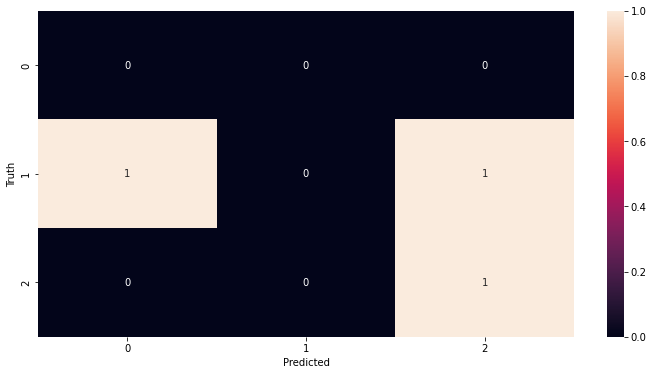

In [160]:
#confusion matrix to evaluating the algorithm
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, zero_division=0))

import seaborn as sn
plt.figure(figsize = (12,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 0.6666666666666666]


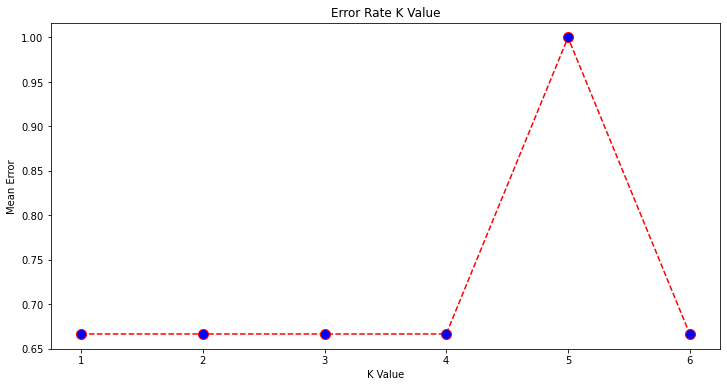

In [161]:
#Comparing Error Rate with the K Value

error = []

# Calculating error for K values between 1 and 7
for i in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)   # K = 1 to 6
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print(error)